## Group Club Case Study

### Partnership with Gunjan Bhogal, gbhogal@vmware.com

## Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Importing Libraries

In [3]:
import pandas as pd
#To display the maximum records upto 130 in notebook
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading dataset

In [4]:
#Reading file loan.csv into a dataframe 'loan'

loan = pd.read_csv('loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [5]:
#Looking at top 5 records

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [6]:
#Looking at the shape of the dataframe

loan.shape

(39717, 111)

In [7]:
#Looking at the columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


## Data Cleaning
- Need to fix rows and columns
- Need to fix missing values
- Need to standardise values
- Need to fix invalid values
- Need to  filter data

In [8]:
#Checking missing values percentage in each column

round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
#Creating a dataframe which contains data columns of loan df with their respective missing value percentage 

percent_missing = loan.isnull().sum() * 100 / len(loan)
missing_value_df = pd.DataFrame({'column_name': loan.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [10]:
# Analysing those columns where all the values are NULL

(missing_value_df['percent_missing'] == 100.00).sum()

54

##### Now we need to drop these 54 columns where all the values are NULL

In [11]:
#Drop columns which have all null values

loan = loan.dropna(axis=1, how='all')
loan.shape

(39717, 57)

In [12]:
#Checking the Null value percentage again

round((loan.isnull().sum()/len(loan.index))*100,4)

id                             0.0000
member_id                      0.0000
loan_amnt                      0.0000
funded_amnt                    0.0000
funded_amnt_inv                0.0000
term                           0.0000
int_rate                       0.0000
installment                    0.0000
grade                          0.0000
sub_grade                      0.0000
emp_title                      6.1913
emp_length                     2.7066
home_ownership                 0.0000
annual_inc                     0.0000
verification_status            0.0000
issue_d                        0.0000
loan_status                    0.0000
pymnt_plan                     0.0000
url                            0.0000
desc                          32.5805
purpose                        0.0000
title                          0.0277
zip_code                       0.0000
addr_state                     0.0000
dti                            0.0000
delinq_2yrs                    0.0000
earliest_cr_

##### Dropping columns where more than 90% values are null and those columns which are not useful in our analysis.

In [13]:
loan_df = loan.drop(['delinq_amnt', 'desc', 'member_id', 'id', 'url', 'next_pymnt_d', 'emp_title','collection_recovery_fee','open_acc',
             'total_acc','last_pymnt_d','last_pymnt_amnt','mths_since_last_record', 'mths_since_last_delinq','acc_now_delinq', 'application_type',
             'total_pymnt','last_credit_pull_d','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths','earliest_cr_line',
             'title','revol_util','zip_code','recoveries','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','inq_last_6mths',
             'revol_bal','delinq_2yrs','tax_liens', 'collections_12_mths_ex_med','out_prncp','out_prncp_inv','pub_rec_bankruptcies','pub_rec'],axis=1)

In [14]:
# Now again Checking missing values percentage in each column

round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [15]:
#Looking at the shape of dataframe after dopping columns 

loan_df.shape

(39717, 17)

##### Looking at the columns with some missing values that can be useful for our analysis

In [16]:
# Looking at the frequency of unique values in 'emp_length'

loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
# Looking at the missing values in 'emp_length'

loan_df.emp_length.isnull().sum()

1075

##### As seen earlier, we can impute these missing values with most frequently occuring value by using mode()

##### As we there are almost 2% missing values in data column 'emp_length', we can impute the missing values with mode which is 10+ years

In [18]:
# Looking at the frequency of values in interest rate column

loan_df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.96%      1
17.34%      1
18.72%      1
14.67%      1
16.20%      1
Name: int_rate, Length: 371, dtype: int64

#### Standardize values in Columns 'int_rate' and 'emp_length'

In [19]:
# Removing % sign from int_rate 

loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')

In [20]:
# Creating a new column 'service_years' by removing available special characters and string in column 'emp_length'

loan_df['service_years'] = loan_df['emp_length'].apply(lambda x: str(x).replace('+','').replace('<','').replace('years','').replace('year','').strip())

In [21]:
# Checking 'service_years' column after removing specific characters

loan_df['service_years'].value_counts()

10     8879
1      7823
2      4388
3      4095
4      3436
5      3282
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: service_years, dtype: int64

In [22]:
# Checking 'int_rate' column after removing %

loan_df['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.54      1
21.48      1
16.96      1
22.64      1
18.36      1
Name: int_rate, Length: 371, dtype: int64

### Creating derived columns

###### Importing datetime

In [23]:
from datetime import datetime

In [24]:
#Breaking down 'issue date' into 'month' and 'year'

loan_df['issue_d_month'] = loan_df['issue_d'].apply(lambda x:datetime.strptime(x, '%b-%y').strftime('%b'))
loan_df['issue_d_year'] = loan_df['issue_d'].apply(lambda x:datetime.strptime(x, '%b-%y').strftime('%Y'))

In [25]:
# Removing current loan status as it's not needed in the analysis

loan_df = loan_df[~(loan_df['loan_status']=='Current')]
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

##### As 'loan_status' is our target variable, it would be useful to convert it into numeric(binary) format. Where '0' is for 'Fully-paid' and '1' is for 'Charged Off' or 'Defaulters'

In [26]:
loan_df['loan_status_binary'] = loan_df['loan_status'].apply(lambda x:x.replace(x,'1') if x=='Charged Off' else x.replace(x,'0'))
loan_df['loan_status_binary'].value_counts()

0    32950
1     5627
Name: loan_status_binary, dtype: int64

### Update column datatype and create buckets for Numerical data

In [27]:
# Changing datatype to Float for following columns

columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'service_years', 'dti', 'int_rate']
loan_df[columns] = loan_df[columns].astype(np.float)

In [28]:
# Changing datatype to integer for following columns

columns = ['issue_d_year','loan_status_binary']
loan_df[columns] = loan_df[columns].astype(np.int)

In [29]:
# Deriving a seperate column for 'int_rate' by creating buckets where value will vary from Low to High

loan_df['int_rate_bucket'] = pd.qcut(loan_df['int_rate'], q=3, labels=['Low','Medium','High'])

In [30]:
# Deriving a seperate column for 'dti' by creating buckets where value will vary from very Low to very High

loan_df['dti_bucket'] = pd.qcut(loan_df['dti'],q=5,labels=['V Low','Low','Medium','High','V High'] )

In [31]:
# Deriving a seperate column for 'annual_inc' by creating buckets where value will vary from very Low to very High

loan_df['annual_inc_bucket'] = pd.qcut(loan_df['annual_inc'],q=5,labels=['V Low','Low','Medium','High','V High'] )

In [32]:
# Deriving a seperate column for 'loan_amnt' by creating buckets where value will vary from very Low to very High

loan_df['loan_amnt_bucket'] = pd.qcut(loan_df['loan_amnt'],q=5,labels=['V Low','Low','Medium','High','V High'] )

In [33]:
# Deriving a seperate column for 'service_years' by creating buckets where value will vary from very Low to very High

loan_df['emp_length_bucket'] = pd.qcut(loan_df['service_years'],q=5, labels=['Low','Medium','High'], duplicates='drop')

In [34]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            38577 non-null  float64 
 1   funded_amnt          38577 non-null  float64 
 2   funded_amnt_inv      38577 non-null  float64 
 3   term                 38577 non-null  object  
 4   int_rate             38577 non-null  float64 
 5   installment          38577 non-null  float64 
 6   grade                38577 non-null  object  
 7   sub_grade            38577 non-null  object  
 8   emp_length           37544 non-null  object  
 9   home_ownership       38577 non-null  object  
 10  annual_inc           38577 non-null  float64 
 11  verification_status  38577 non-null  object  
 12  issue_d              38577 non-null  object  
 13  loan_status          38577 non-null  object  
 14  purpose              38577 non-null  object  
 15  addr_state         

In [35]:
# Looking randomly at 'loan_amnt_buckets' to cross-check

loan_df.loc[:,['loan_amnt','loan_amnt_bucket']].sample(10)

,loan_amnt,loan_amnt_bucket
9974,9600.0,Medium
6052,5000.0,V Low
26600,12000.0,High
15565,2000.0,V Low
15252,4800.0,V Low
8426,30000.0,V High
8771,14400.0,High
3830,14000.0,High
39608,8000.0,Medium
15816,4000.0,V Low


In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            38577 non-null  float64 
 1   funded_amnt          38577 non-null  float64 
 2   funded_amnt_inv      38577 non-null  float64 
 3   term                 38577 non-null  object  
 4   int_rate             38577 non-null  float64 
 5   installment          38577 non-null  float64 
 6   grade                38577 non-null  object  
 7   sub_grade            38577 non-null  object  
 8   emp_length           37544 non-null  object  
 9   home_ownership       38577 non-null  object  
 10  annual_inc           38577 non-null  float64 
 11  verification_status  38577 non-null  object  
 12  issue_d              38577 non-null  object  
 13  loan_status          38577 non-null  object  
 14  purpose              38577 non-null  object  
 15  addr_state         

### Creating user defined functions, to do further analysis on the basis of Default Rate%

In [37]:
# Creating a user defined function for further analysis on Default Rate
# Default Rate will provide the average of 'Defaulters' in particular column
# To convert it into %, we will multiply the mean with 100 and round off to two decimals

def default_rate(df, myList=[],*args):
    return round(loan_df.groupby(myList)['loan_status_binary'].mean()*100,2)


In [38]:
# Providing the Figure Size and lable on y-axis in a variable

figure_size=[12,8]
ylabel="Default Rate%"

In [39]:
# Creating a user defined function for showing barcharts on different variables for Univariate analysis

def custom_plot(x,**plt_kwargs):
    return(x.plot.bar(figsize=figure_size))


### Finding top predictors for Defaulters

In [40]:
# To find the predictors, we need to find the difference between the maximum and the minimum value of Default Rate for different columns
# Defining a function to find out the difference

def predictors(df, myList=[],*args):
    min_df_rate = loan_df.groupby(myList)['loan_status_binary'].mean().min()
    max_df_rate = loan_df.groupby(myList)['loan_status_binary'].mean().max()
    return(round((max_df_rate-min_df_rate),2))


In [41]:
# Finding out the difference between max and min Default Rate for different columns of the dataframe 'loan_df'

predictor_name = []
predictor_diff = []
for i in loan_df.columns:
    predictor_diff.append(predictors(df=loan_df,myList=i))
    predictor_name.append(i)
data = {'predictor_name':predictor_name,
        'predictor_diff':predictor_diff
       }    
predictors_df = pd.DataFrame(data,columns=['predictor_name','predictor_diff'])

In [42]:
# Finding out the top predictors and ignoring the ones where difference is 1 which means for those predictors groupby mean of the loan_status is varying from 0% to 100%

sorted_predictors = predictors_df.sort_values(by='predictor_diff', ascending=False)
sorted_predictors[sorted_predictors['predictor_diff']<1.00]

,predictor_name,predictor_diff
15,addr_state,0.60
7,sub_grade,0.45
6,grade,0.28
12,issue_d,0.21
9,home_ownership,0.18
14,purpose,0.17
21,int_rate_bucket,0.16
3,term,0.14
23,annual_inc_bucket,0.07
24,loan_amnt_bucket,0.06


##### Some of the predictors are:
#### int_rate, annual_inc, loan_amnt, dti, grade, term, home_ownership, purpose, issue_d, addr_state, verification_status

##### Now we know some of our top predictors, we will analyse data on the basis of these predictors and will find out the most driving factors 

## Univariate Analysis 

##### Plotting a graph between 'Term' and 'Default Rate%'

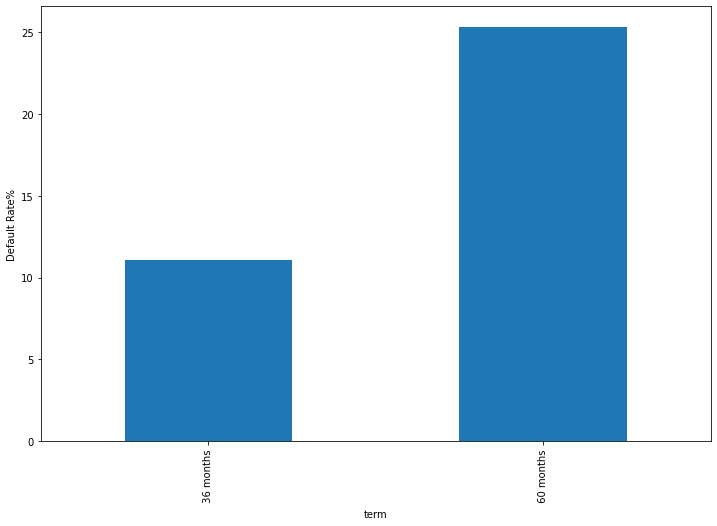

In [43]:
custom_plot(default_rate(df=loan_df, myList=['term']))
plt.ylabel(ylabel)
plt.show()

#### With the above graph, we can find that people opting for long term loan plans are likely to default. Lets analyse the term with other variables as well in Bivariate Analysis

##### Plotting a graph between 'Verification_status' and 'Default Rate%'

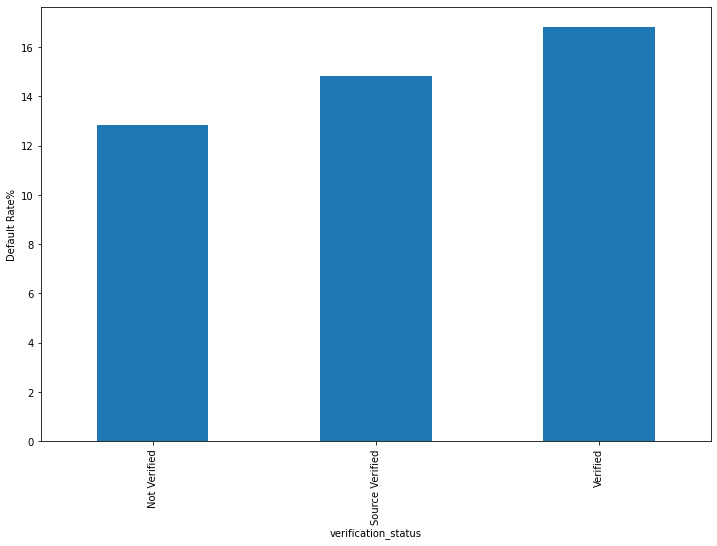

In [44]:
custom_plot(default_rate(df=loan_df, myList=['verification_status']))
plt.ylabel(ylabel)
plt.show()

#### With the above graph, we don't see much variation between the different 'verification_status'. Hence, we can't consider 'verification_status' of the person as a Driving factor for finding out the defaulters.

##### Plotting a graph between 'Home_ownership' and 'Default Rate%'

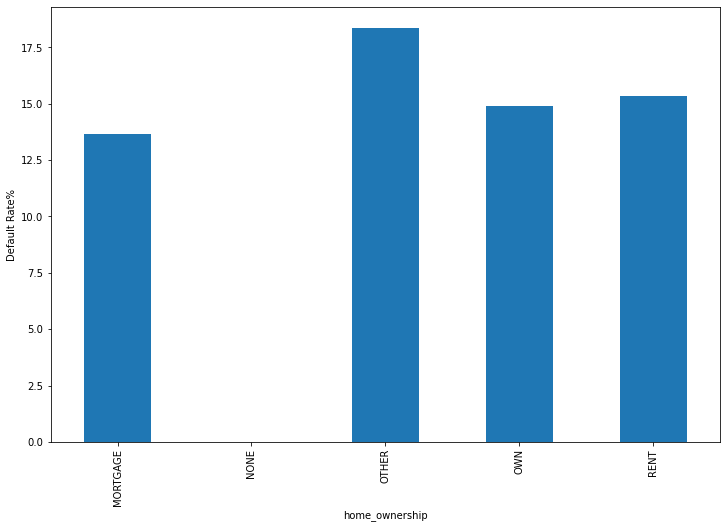

In [45]:
custom_plot(default_rate(df=loan_df, myList=['home_ownership']))
plt.ylabel(ylabel)
plt.show()

#### With the above graph, we can find that people with home_ownership mentioned as 'others' and who are living on 'rent' are more likely to default.

##### Plotting a graph between 'int_rate_bucket' and 'Default Rate%'

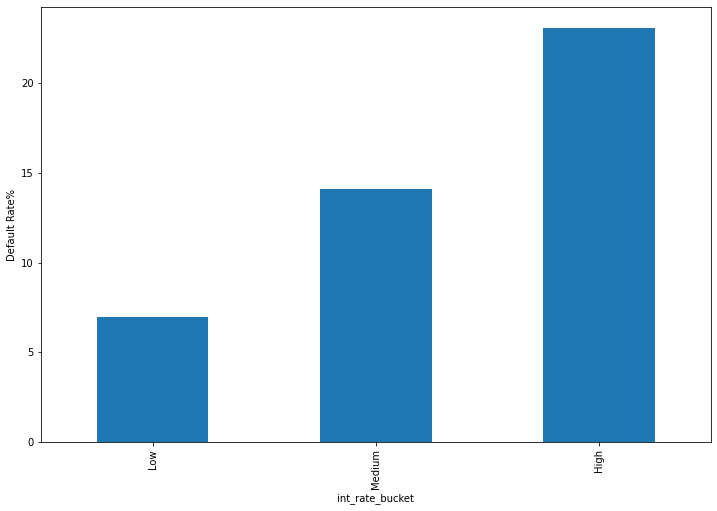

In [46]:
custom_plot(default_rate(df=loan_df, myList=['int_rate_bucket']))
plt.ylabel(ylabel)
plt.show()

#### People with High Interest Rates are more likely to default. Lets analyse this with other variables as well in Bivariate Analysis

##### Plotting a graph between 'purpose' and 'Default Rate'

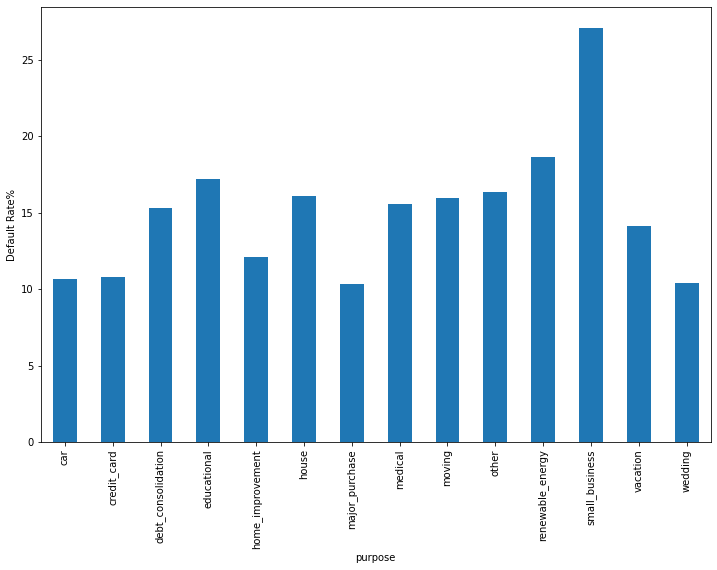

In [47]:
custom_plot(default_rate(df=loan_df, myList=['purpose']))
plt.ylabel(ylabel)
plt.show()

#### People opting loan for 'small_business' are more likely to default. Lets analyse this with other variables as well in Bivariate Analysis

##### Plotting a graph between 'grade' and 'Default Rate'

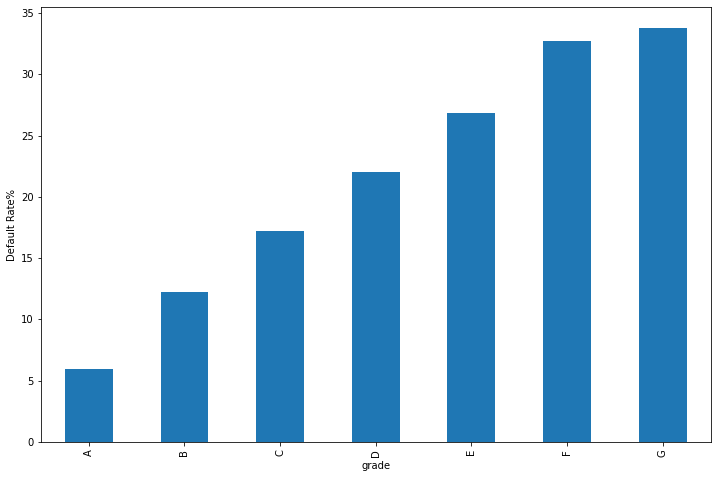

In [48]:
custom_plot(default_rate(df=loan_df, myList=['grade']))
plt.ylabel(ylabel)
plt.show()

##### Plotting a graph between 'sub_grade' and 'Default Rate'

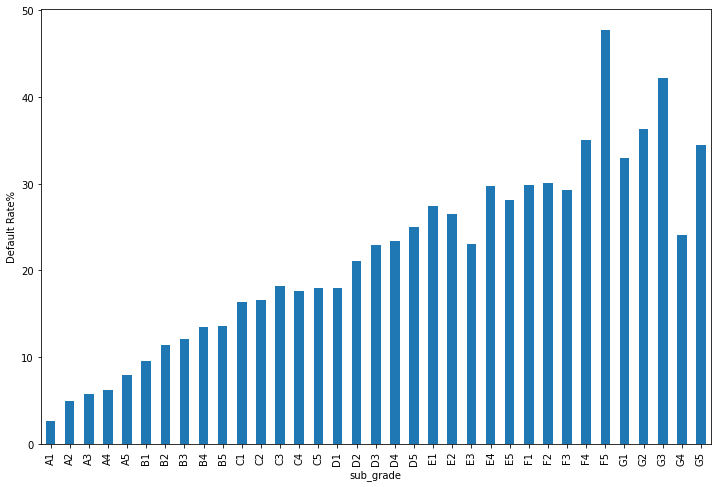

In [49]:
custom_plot(default_rate(df=loan_df, myList=['sub_grade']))
plt.ylabel(ylabel)
plt.show()

#### With above two graphs for 'Grade' and 'Sub-grade', we found that people with 'F' and 'G' grades are more likely to default. Lets analyse 'Grade' with other variables as well in Bivariate Analysis

##### Plotting a graph between 'issuing month' and 'Default Rate'

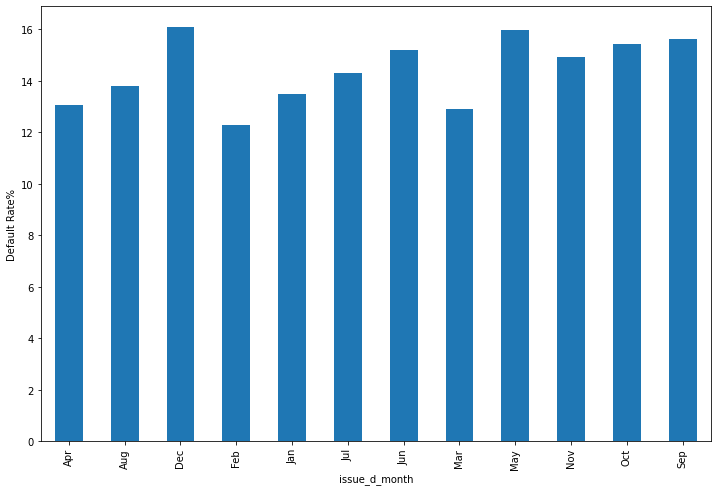

In [50]:
custom_plot(default_rate(df=loan_df, myList=['issue_d_month']))
plt.ylabel(ylabel)
plt.show()

#### With above graph, we can say that Default Rate is high in December(because of festive season in USA) and in May(because of school admissions). But, we are not sure that it will always be the scene as variation is very low between the different months. Hence, we cannot use this variable as the driving factor.

##### Plotting a graph between 'issuing year' and 'Default Rate'

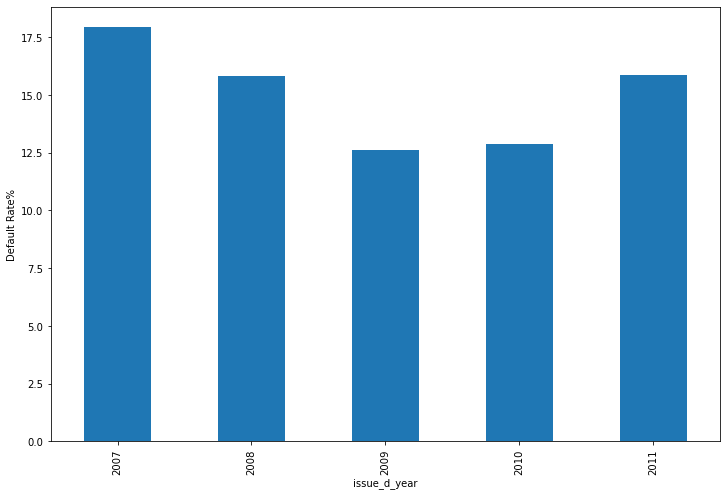

In [51]:
custom_plot(default_rate(df=loan_df, myList=['issue_d_year']))
plt.ylabel(ylabel)
plt.show()

#### No insights were received from the year of issuing the loan with respect to people who are Charged-off. Let's reject this as the most driving factor.

##### Plotting a graph between 'addr_state' and 'Default Rate'

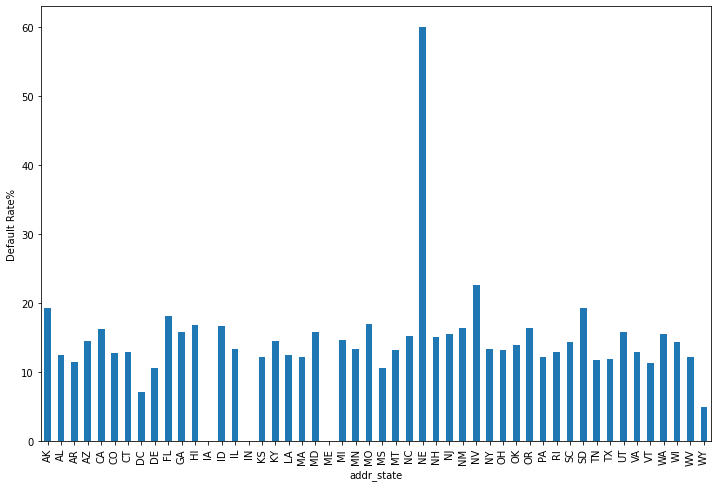

In [52]:
custom_plot(default_rate(df=loan_df, myList=['addr_state']))
plt.ylabel(ylabel)
plt.show()

#### With above analysis, we can say that the default rate is high in the state 'NE', maybe the cost of living is high in this state but we are not sure about our assumptions. Let's reject this as the driving factor.

##### Plotting a graph between 'service_years' and 'Default Rate'

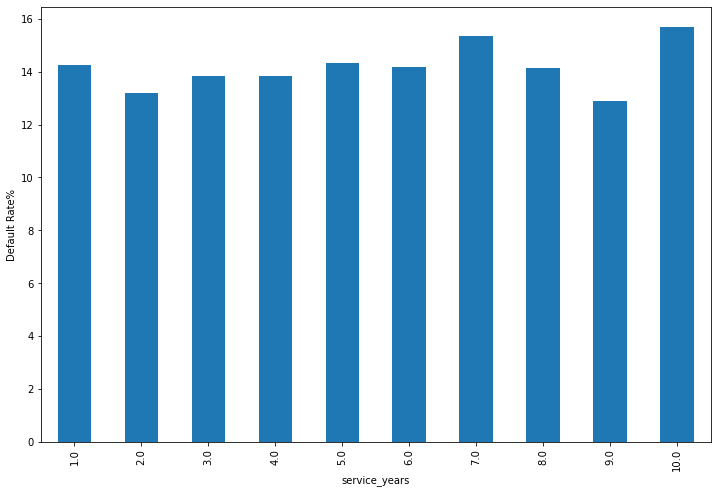

In [53]:
custom_plot(default_rate(df=loan_df, myList=['service_years']))
plt.ylabel(ylabel)
plt.show()

#### No insights were received from 'years of service'. Let's reject this as the driving factor.

##### Plotting a graph between 'dti' and 'Default Rate%'

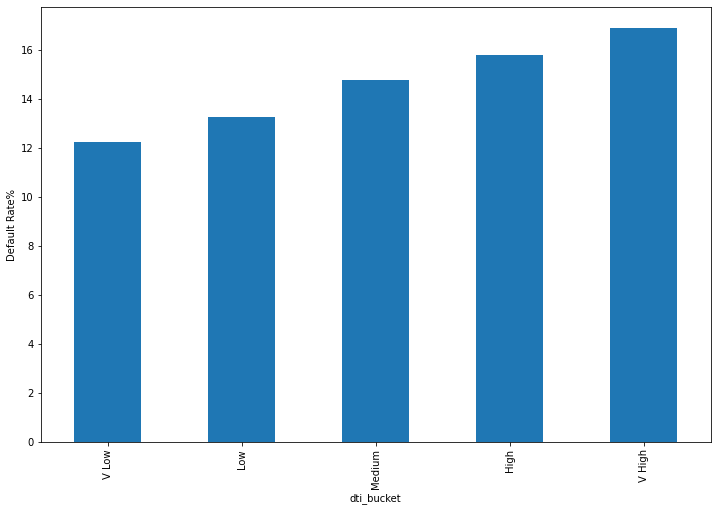

In [54]:
custom_plot(default_rate(df=loan_df, myList=['dti_bucket']))
plt.ylabel(ylabel)
plt.show()

#### People with very High/High 'Debt to Income' are more likely to be defaulters. Lets analyse this with other variables as well in Bivariate Analysis.

##### Plotting a graph between 'annual_inc and 'Default Rate%'

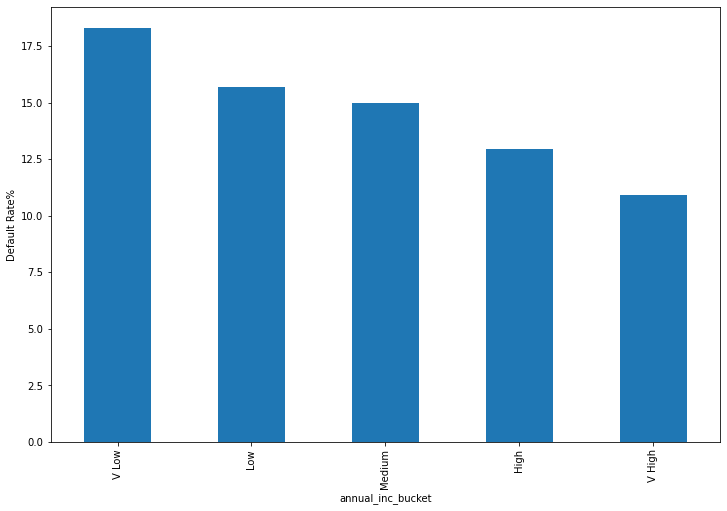

In [55]:
custom_plot(default_rate(df=loan_df, myList=['annual_inc_bucket']))
plt.ylabel(ylabel)
plt.show()

#### People with very Low/Low 'Income' are more likely to be defaulters. Lets analyse this with other variables as well in Bivariate Analysis.

##### Plotting a graph between 'loan_amnt_bucket' and 'Default Rate%'

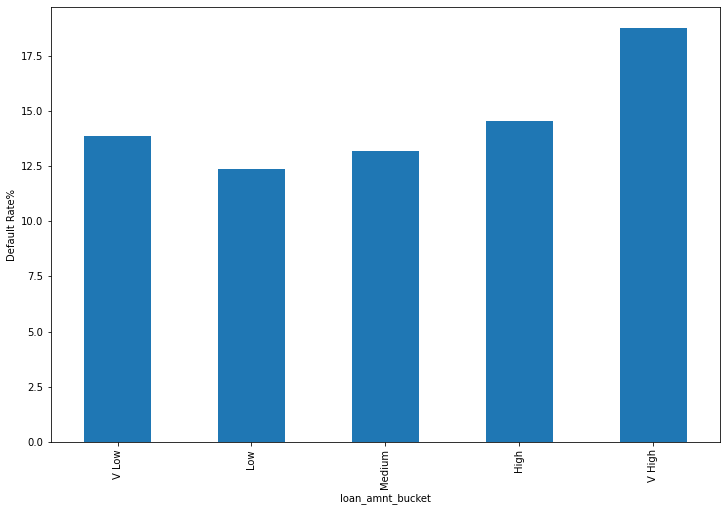

In [56]:
custom_plot(default_rate(df=loan_df, myList=['loan_amnt_bucket']))
plt.ylabel(ylabel)
plt.show()

#### People with very High 'loan_amount' are more likely to be defaulters in paying loan. Lets analyse this with other variables as well in Bivariate Analysis.

### With the above Univariate Analysis we get some insights that people having low income, high interest rates or opted for high loan amount or long term(60 months) plans are likely to be defaulters.

## Bivariate Analysis

In [57]:
# Label on y-axis for Bivariate Analysis

ylabel2="Default Rate"

In [58]:
# Creating a function to build a pivot table for Bivariate Analysis
# It takes list of columns and index

def create_pivot(col1, ind):
    return(pd.pivot_table(data=loan_df, columns=col1, values='loan_status_binary', index=ind))

##### Plotting a graph for 'term' and 'purpose' against 'Default Rate'

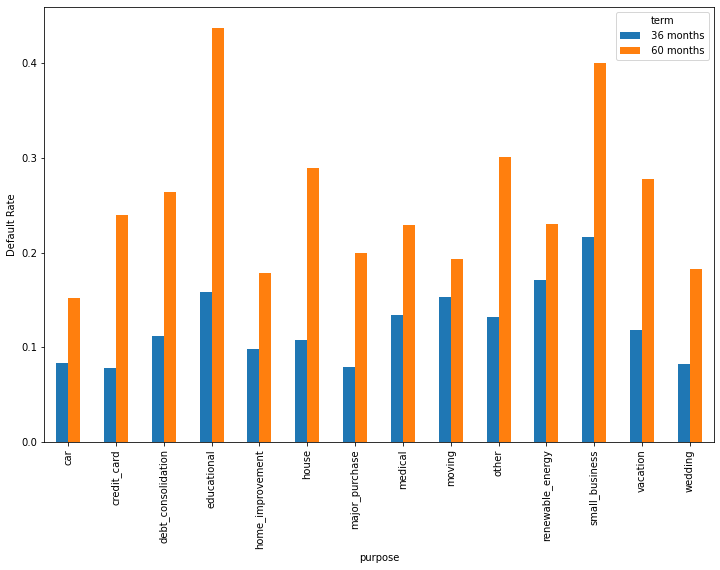

In [59]:
custom_plot(create_pivot(['term'],['purpose']))
plt.ylabel(ylabel2)
plt.show()

##### Plotting a graph for 'term' and 'grade' against 'Default Rate'

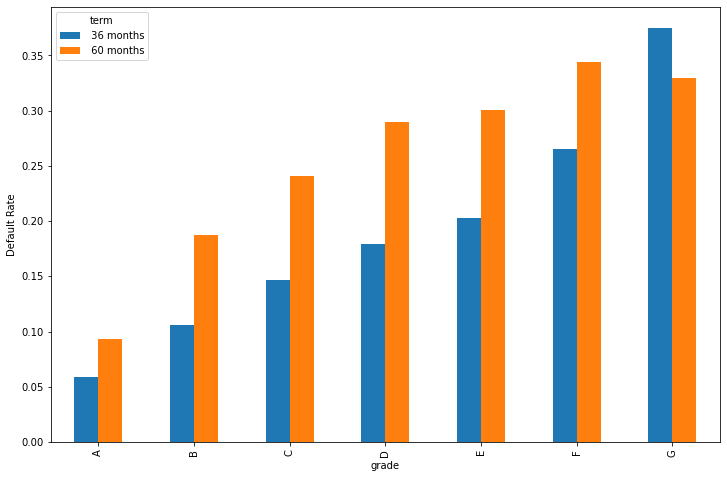

In [60]:
custom_plot(create_pivot(['term'],['grade']))
plt.ylabel(ylabel2)
plt.show()

#### People with grades 'F' and 'G' have high Defalut Rate irrespective of the tenture for loan

##### Plotting a graph for 'int_rate' and 'purpose' against 'Default Rate'

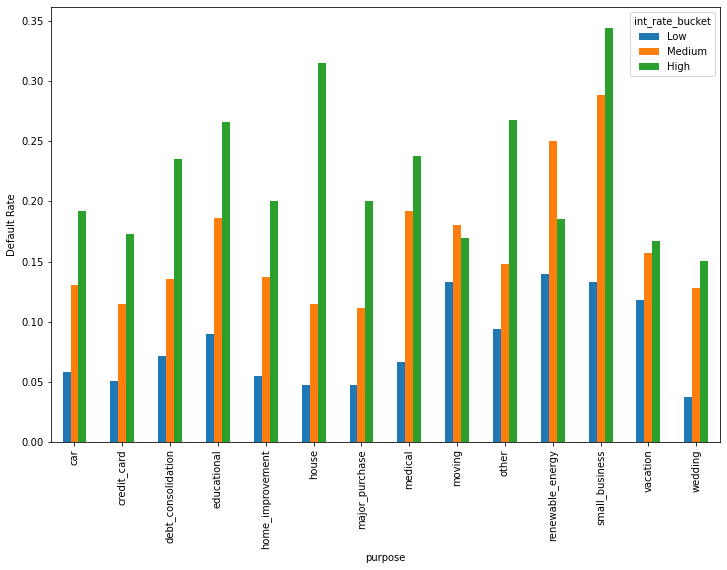

In [61]:
custom_plot(create_pivot(['int_rate_bucket'],['purpose']))
plt.ylabel(ylabel2)
plt.show()

#### People opting loan for 'small_business' or 'house' with High Interest Rates are more likely to be defaulters

##### Plotting a graph for 'int_rate' and 'annual_inc' against 'Default Rate'

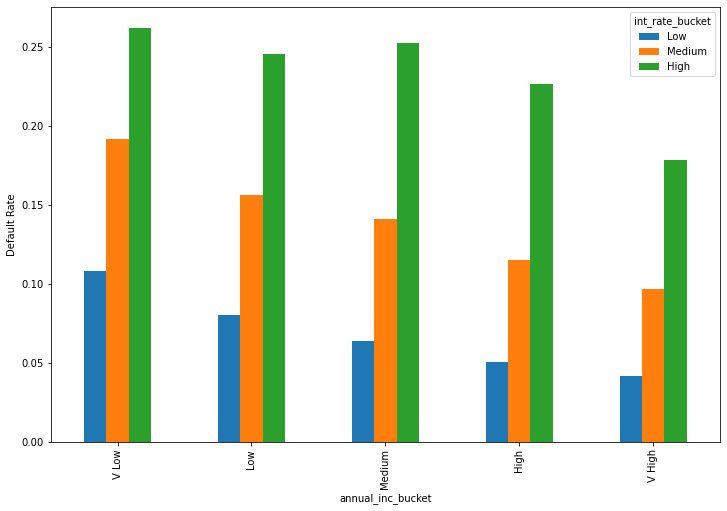

In [62]:
custom_plot(create_pivot(['int_rate_bucket'],['annual_inc_bucket']))
plt.ylabel(ylabel2)
plt.show()

#### People with Very Low-Low income and High-very High Interest Rates are more likely to be Charged-Off

##### Plotting a graph for 'loan_amount' and 'annual_inc' against 'Default Rate'

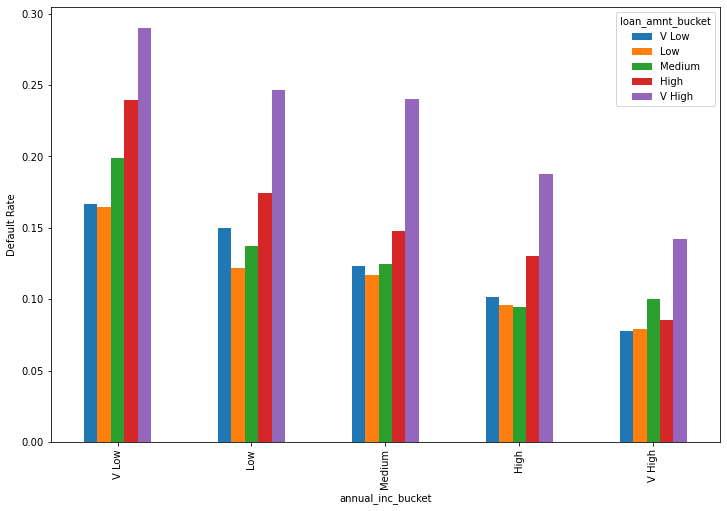

In [63]:
custom_plot(create_pivot(['loan_amnt_bucket'],['annual_inc_bucket']))
plt.ylabel(ylabel2)
plt.show()

#### People with Low Annual Income opting for High loan amount are more likely to be defaulters

##### Plotting a graph for 'loan_amount' and 'int_rate' against 'Default Rate'

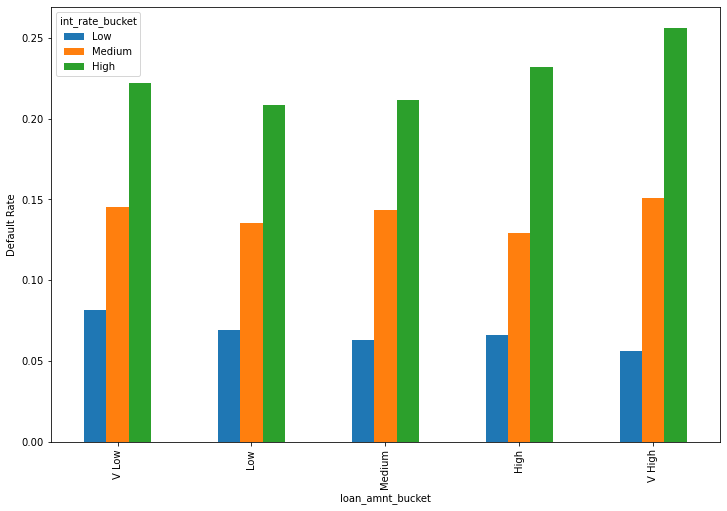

In [64]:
custom_plot(create_pivot(['int_rate_bucket'],['loan_amnt_bucket']))
plt.ylabel(ylabel2)
plt.show()

##### Plotting a graph for 'loan_amount' and 'dti' against 'Default Rate'

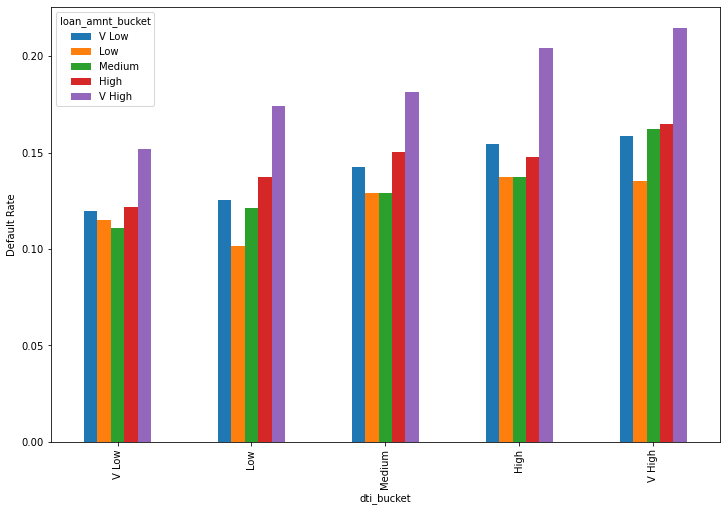

In [65]:
custom_plot(create_pivot(['loan_amnt_bucket'],['dti_bucket']))
plt.ylabel(ylabel2)
plt.show()

#### People with High-very High 'Debt to Income' opting for Higher loan amount are likely to default

### With our analysis we found out the most driving factors that can let Lending Club know the applicants at the time of application submission that are not likely to pay the loan.

### These driving factors are Interest Rate, Debt to Income, Loan Amount, Annual Income, Purpose.

### Some of the insights are:
#### - People with Low Income applying for High Loan Amount are more likely to Default. Lending Club should put some cap on loan amounts according to annual salary earned by the applicant.
#### - People opting loan for 'House' or 'Small Business' with high Interest Rates are more to be defaulters.
#### - People with High Debt to Income are more likely to be Charged-Off.